In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Load dataset and convert embeddings
# -----------------------------
df = pd.read_csv("/kaggle/input/randomforest/XlmRoberta_English_dataset_LLMdetect_balanced.csv")

# Convert space-separated embeddings to numpy arrays
def str_to_array(s):
    s = s.strip("[]")
    return np.array([float(x) for x in s.split()])

df['XLMRoberta2_embeddings'] = df['XLMRoberta2_embeddings'].apply(str_to_array)

X = np.array(df['XLMRoberta2_embeddings'].tolist())
y = np.array(df['label'])

In [5]:
# Or both together
print("Dataset shape (rows, columns):", df.shape)

Dataset shape (rows, columns): (5000, 4)


In [2]:
# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# -----------------------------
# 2. Initialize and train Random Forest
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,        # let trees grow fully
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# -----------------------------
# 3. Predictions
# -----------------------------
y_pred = rf_model.predict(X_val)

In [3]:
# -----------------------------
# 4. Evaluation metrics
# -----------------------------
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=["Human", "AI"]))

Accuracy: 0.985
Precision: 0.9840319361277445
Recall: 0.986
F1 Score: 0.9850149850149851

Classification Report:
               precision    recall  f1-score   support

       Human       0.99      0.98      0.98       500
          AI       0.98      0.99      0.99       500

    accuracy                           0.98      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.98      0.98      1000



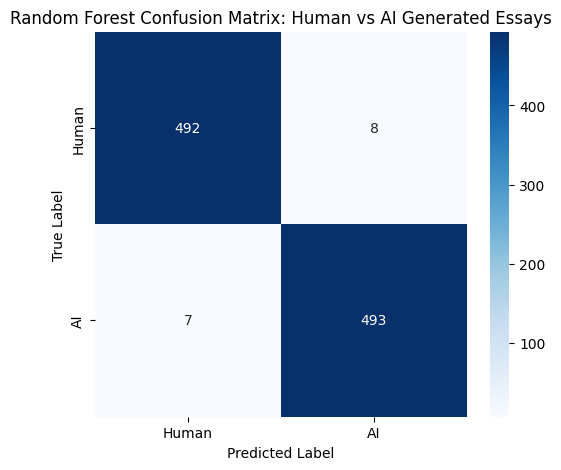

In [4]:
# -----------------------------
# 5. Confusion matrix
# -----------------------------
cm = confusion_matrix(y_val, y_pred)
labels = ["Human", "AI"]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix: Human vs AI Generated Essays")
plt.show()